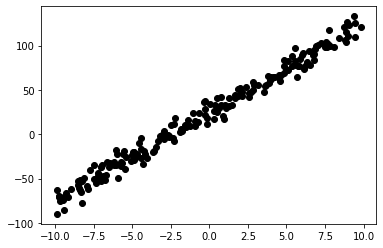

In [21]:
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/AssignmentFolder/Assignment03/data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]


inputData = plt.scatter(x_data, y_data)
plt.setp(inputData, color = 'k', linewidth = 1.0)
#plt.axis([-30, 30, 0, 150])
#plt.figure(figsize=(8, 8))

plt.show()


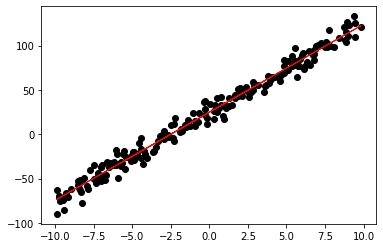

In [36]:
#theta0, theta1
#J는 에너지
J = 0
th0 = 0.0
th1 = 0.0

#step size
a = 0.01

#간단한 식을 만들기 위해1
def hypothesis(t0, t1, x):
    return t0 * x + t1

#theta0, theta1, 에너지 값들 저장할 리스트
th0_list = []
th1_list = []
J_list = []

#Loops : converge할 때까지
while 1:
    #간단한 식을 만들기 위해2
    h = hypothesis(th0, th1, x_data) - y_data
    
    #Gradient Descent
    #energy gradient descent
    J = np.mean(h ** 2)/ 2

    #임시변수 tmp0, tmp1에 이전 theta값들을 저장합니다
    #converge를 확인하지 위함
    tmp0 = th0
    tmp1 = th1
    #Theta gradient descent
    th0 -= a * np.mean(h * x_data) 
    th1 -= a * np.mean(h)
    #리스트에 값 넣기
    J_list.append(J)
    th0_list.append(th0)
    th1_list.append(th1)
    #convergence 확인
    if th0 == tmp0 and th1 == tmp1 and J == np.mean(h ** 2) / 2:
        break
    
#line1 : linear regression한 직선
line1 = plt.plot(x_data, hypothesis(th0, th1, x_data))
#input data : input값들
inputData = plt.scatter(x_data, y_data)

plt.setp(line1, color = 'r', linewidth = 1.0)
plt.setp(inputData, color = 'k', linewidth = 1.0)
plt.show()

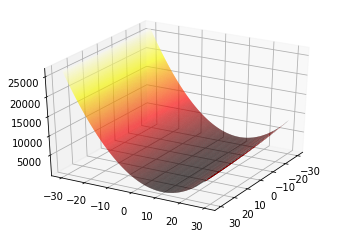

In [35]:
from mpl_toolkits.mplot3d import Axes3D

#x축, y축 : [-30, 0.1, 30]의 축들 (x축 = theta0, y축 = theta1)
t0_list = np.arange(-30,30,0.1)
t1_list = np.arange(-30,30,0.1)
#Energy 리스트 초기화
E_list = np.ones((len(t0_list), len(t1_list)))
#Energy
E = 0
#theta 0 axis와 theta1 axis들의 count
t0_ax = 0
t1_ax = 0
#loop : Energy리스트에 x축, y축이 정해졌을 때에
while t0_ax < len(t0_list):
  while t1_ax < len(t1_list):
    #간단한 식을 만들기 위해3
    h = hypothesis(t0_list[t0_ax], t1_list[t1_ax], x_data) - y_data
    #Energy식
    E = np.mean(h ** 2) / 2
    #t0_ax : x축 위치, t1_ax : y축 위치 인 곳의 Energy값을 리스트에 넣는다
    E_list[t0_ax][t1_ax] = E
    #다음 y 위치로 이동(0.1만큼)
    t1_ax = t1_ax + 1 
  #다음 x 위치로 이동(0.1만큼) 
  t0_ax = t0_ax + 1
  #y는 0부터 시작
  t1_ax = 0
#meshgrid : plot_surface를 이용하기 위해 vector가 아닌 2차원 그리드 좌표로 만듦
t0_list,t1_list = np.meshgrid(t0_list, t1_list)
#3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#리스트들 뒤에 있는 값은 색을 정하기 위함
ax.plot_surface(t0_list, t1_list, E_list, cstride = 1, rstride = 1, cmap = plt.cm.hot)
#보기 편하기 위해 회전
ax.view_init(30, 30)
plt.show()

In [0]:

#theta0 와 theta1 gradient descent들의 리스트
t0_line = []
t1_line = []
#energy J theta들의 리스트
Jt_list = [] 

#theta0, theta1의 초기값 -30
th0 = -30.0
th1 = -30.0

#초기값을 리스트에 넣는다
t0_line.append(th0)
t1_line.append(th1)

#step size
a = 0.01

#loop
while 1:
    #간단한 식을 만들기 위해3
    h = hypothesis(th0, th1, x_data) - y_data
    #Energy gradient descent
    Jt = np.mean(h ** 2) / 2  
    #previous값 저장
        
    th0_g = np.mean(h * x_data) 
    th1_g = np.mean(h)     
    
    tmp0 = th0
    tmp1 = th1
    #theta gradient descent
    th0 = th0 - a * th0_g
    th1 = th1 - a * th1_g
    
    #list에 저장
    t0_line.append(th0)
    t1_line.append(th1)
    Jt_list.append(Jt)
    #그대로 루프 종료할 경우 초기 값을 넣지 않았던 Energy는 size가 1개 부족
    if th0 == tmp0 and th1 == tmp1 and Jt == np.mean(h ** 2) / 2:
        #energy 리스트에 값을 넣어준다
        Jt_list.append(Jt)
        break

#surface위에 선 긋기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(t0_list, t1_list, E_list, cstride = 1, rstride = 1, cmap = plt.cm.hot)
ax.plot(t1_line, t0_line, Jt_list, color='black')
ax.view_init(30, 30)
plt.show()